<a href="https://colab.research.google.com/github/SaravanavelE/CodeClauseInternship_Heart-Disease-Risk-Assessment/blob/main/Heart%20Disease%20Risk%20Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***IMPORT THE NECCESSORY LIBRARIES***

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

***IMPORT THE DATASET***

In [5]:
d=pd.read_csv("/content/drive/MyDrive/techh/heart.csv")
d.head()

,General_Health,Exercise,Depression,Diabetes,Sex,Age_Category,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Heart_Disease
0,Poor,No,No,No,Female,70-74,32.66,14.54,Yes,No,No
1,Very Good,No,No,Yes,Female,70-74,77.11,28.29,No,No,Yes
2,Very Good,Yes,No,Yes,Female,60-64,88.45,33.47,No,No,No
3,Poor,Yes,No,Yes,Male,75-79,93.44,28.73,No,Yes,Yes
4,Good,No,No,No,Male,80+,88.45,24.37,Yes,Yes,No


***SPLIT THE DATASET INTO X & Y***

In [14]:
x=pd.DataFrame(d,columns=['General_Health','Diabetes','Exercise','Age_Category','Weight_(kg)','Smoking_History','Alcohol_Consumption'])
y=pd.DataFrame(d,columns=['Heart_Disease'])
print(x.head())
print(y.head())

  General_Health Diabetes Exercise Age_Category  Weight_(kg) Smoking_History  \
0           Poor       No       No        70-74        32.66             Yes   
1      Very Good      Yes       No        70-74        77.11              No   
2      Very Good      Yes      Yes        60-64        88.45              No   
3           Poor      Yes      Yes        75-79        93.44              No   
4           Good       No       No          80+        88.45             Yes   

  Alcohol_Consumption  
0                  No  
1                  No  
2                  No  
3                 Yes  
4                 Yes  
  Heart_Disease
0            No
1           Yes
2            No
3           Yes
4            No


***LABEL ENCODER FOR ENCODING THE FEATURES***

In [49]:
le = LabelEncoder()

x['General_Health'] = le.fit_transform(x['General_Health'])
x['Diabetes'] = le.fit_transform(x['Diabetes'])
x['Exercise'] = le.fit_transform(x['Exercise'])
x['Smoking_History'] = le.fit_transform(x['Smoking_History'])
x['Alcohol_Consumption'] = le.fit_transform(x['Alcohol_Consumption'])
y['Heart_Disease'] = le.fit_transform(y['Heart_Disease'])

print(x.head())
print(y.head())


   General_Health  Diabetes  Exercise  Smoking_History  Alcohol_Consumption
0               1         0         1                1                    2
1               0         1         0                2                    0
2               2         0         1                0                    1
   Heart_Disease
0              0
1              1
2              0


***SPLIT THE DATASET INTO TRAINING AND TESTING DATASET***

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2, 5), (1, 5), (2, 1), (1, 1))

***LINEAR REGRESSION MODEL***

In [52]:
lr= LinearRegression()
lr.fit(x_train, y_train)
lr

LinearRegression()

***PREDICTION***

In [66]:
y_pred = lr.predict(x_test)
y_pred

array([[0.27272727]])

***MEAN SQUARED ERROR***

In [67]:
mse=mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.07438016528925631


***PLOT HISTOGRAMS FOR EACH FEATURE***

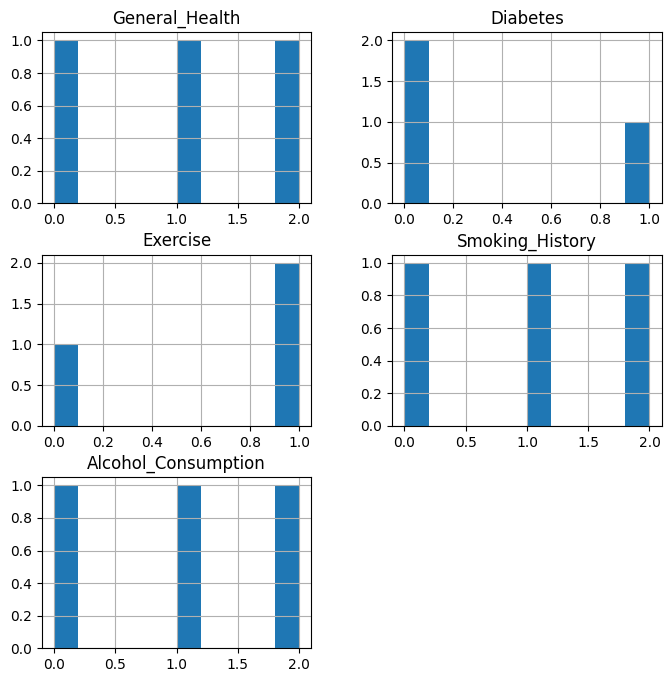

In [73]:
x.hist(figsize=(8,8))
plt.show()

***CORRELATION MATRIX***

In [64]:
corr_matrix = x.corr()
print("correlation Matrix:\n\n",corr_matrix)

correlation Matrix:

                      General_Health  Diabetes  Exercise  Smoking_History  \
General_Health             1.000000 -0.866025  0.866025        -1.000000   
Diabetes                  -0.866025  1.000000 -1.000000         0.866025   
Exercise                   0.866025 -1.000000  1.000000        -0.866025   
Smoking_History           -1.000000  0.866025 -0.866025         1.000000   
Alcohol_Consumption        0.500000 -0.866025  0.866025        -0.500000   

                     Alcohol_Consumption  
General_Health                  0.500000  
Diabetes                       -0.866025  
Exercise                        0.866025  
Smoking_History                -0.500000  
Alcohol_Consumption             1.000000  


***HEAT MAP***

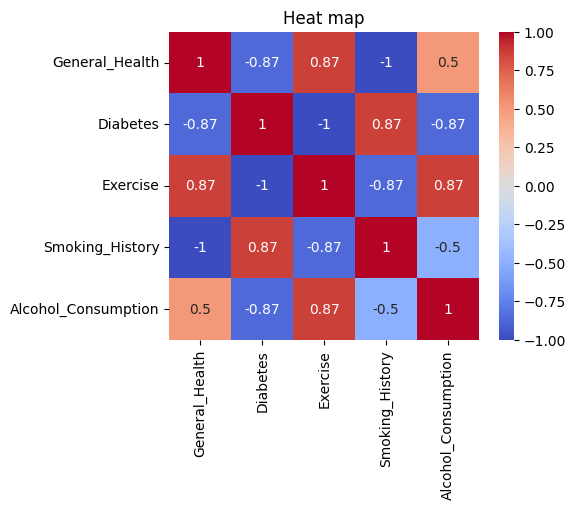

In [65]:
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat map')
plt.show()